In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# 1st, read weapon data
df_weapon = pd.read_csv("weapons.csv")

# clean up data by remove id, description, and image_url columns
df_weapon = df_weapon.drop(df_weapon.columns[[0, 3]], axis=1)

# remove trailing white space in column names
df_weapon.columns = df_weapon.columns.str.strip()

# remove all possible trailing white space in all columns
df_weapon = df_weapon.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# create list of weapons for magic build
magic_buold = ["Moonveil", "Meteoric Ore Blade"]
# create list for dex bleed build
dex_bleed_build = ["Uchigatana", "Nagakiba", "Rivers of Blood", "Hand of Malenia"]
# list of colors
colors = [
    "darkred",
    "darkorange",
    "darkblue",
    "grey",
    "purple",
    "darkgreen",
    "darkgoldenrod",
    "darkcyan",
    "darkmagenta",
    "darkkhaki",
    "darkslateblue",
    "darkolivegreen",
]
new_colors = [
    "#ffcccb",
    "orange",
    "blue",
    "lightgrey",
    "#CBC3E3",
    "#90EE90",
    "#FFD700",
    "#00CED1",
    "#FF00FF",
    "#F0E68C",
    "#483D8B",
    "#556B2F",
]

In [3]:
# print all weapon data categories
print(df_weapon.columns)

# print number of weapons
print("length: ", len(df_weapon))

# print category of weapons all count how many of each
print("\n", df_weapon["category"].value_counts())

Index(['name', 'image', 'attack', 'defence', 'scalesWith',
       'requiredAttributes', 'category', 'weight'],
      dtype='object')
length:  307

 category
Greatsword               20
Straight Sword           19
Glintstone Staff         18
Spear                    17
Dagger                   16
Hammer                   15
Halberd                  15
Colossal Weapon          15
Curved Sword             15
Axe                      14
Warhammer                14
Colossal Sword           11
Greataxe                 10
Fist                      9
Sacred Seal               9
Curved Greatsword         9
Katana                    8
Thrusting Sword           7
Crossbow                  7
Bow                       7
Torch                     6
Twinblade                 6
Great Spear               6
Whip                      6
Light Bow                 5
Flail                     5
Reaper                    4
Heavy Thrusting Sword     4
Greatbow                  4
Claw                      4
Bal

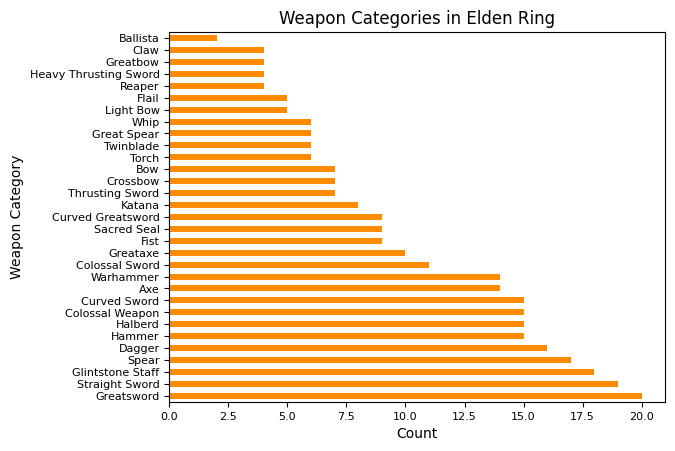

Most common weapon category:  Greatsword
Least common weapon category:  Ballista


In [4]:
# make bar graph of weapon categories and their counts & set color to match the game theme LOL
# switch axis so that it is horizontal so name on the left and count bottom
df_weapon["category"].value_counts().plot(kind="barh", color="darkorange", fontsize=8)
plt.xlabel("Count")
plt.ylabel("Weapon Category")
plt.title("Weapon Categories in Elden Ring")
plt.show()

# get the most common weapon category in the game
commonWeapon = df_weapon["category"].value_counts().idxmax()
print("Most common weapon category: ", commonWeapon)

# least common weapon category in the game
leastCommonWeapon = df_weapon["category"].value_counts().idxmin()
print("Least common weapon category: ", leastCommonWeapon)

In [5]:
# get names of weapons that are in the most common category
commonWeaponNames = df_weapon.loc[df_weapon["category"] == commonWeapon, "name"]

# we then obtain dataframes of the weapons that are in the most common
df_commonWeapon = df_weapon.loc[df_weapon["category"] == commonWeapon]

# remove image for now since it's not needed
df_commonWeapon = df_commonWeapon.drop(df_commonWeapon.columns[[1]], axis=1)

# print dataframes in table format
df_commonWeapon.head(5)

,name,attack,defence,scalesWith,requiredAttributes,category,weight
151,Bastard Sword,"[{'name': 'Phy', 'amount': 138}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 50}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'D'}, {'name': 'De...","[{'name': 'Str', 'amount': 16}, {'name': 'Dex'...",Greatsword,9.0
152,Forked Greatsword,"[{'name': 'Phy', 'amount': 124}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 47}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'D'}, {'name': 'De...","[{'name': 'Str', 'amount': 14}, {'name': 'Dex'...",Greatsword,9.0
153,Iron Greatsword,"[{'name': 'Phy', 'amount': 149}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 56}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': '?'}, {'name': 'De...","[{'name': 'Str', 'amount': 18}, {'name': 'Dex'...",Greatsword,12.0
154,Lordsworn's Greatsword,"[{'name': 'Phy', 'amount': 136}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 50}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'D'}, {'name': 'De...","[{'name': 'Str', 'amount': 16}, {'name': 'Dex'...",Greatsword,9.0
155,Knight's Greatsword,"[{'name': 'Phy', 'amount': 141}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 52}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'D'}, {'name': 'De...","[{'name': 'Str', 'amount': 16}, {'name': 'Dex'...",Greatsword,10.0


In [6]:
# get names of weapons that are in the least common category
leastCommonWeaponNames = df_weapon.loc[
    df_weapon["category"] == leastCommonWeapon, "name"
]

df_leastCommonWeapon = df_weapon.loc[df_weapon["category"] == leastCommonWeapon]

df_leastCommonWeapon = df_leastCommonWeapon.drop(
    df_leastCommonWeapon.columns[[1]], axis=1
)

df_leastCommonWeapon.head(5)

,name,attack,defence,scalesWith,requiredAttributes,category,weight
14,Hand Ballista,"[{'name': 'Phy', 'amount': 135}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 0}, {'name': 'Mag',...",[{'name': '-'}],"[{'name': 'Str', 'amount': 30}, {'name': 'Dex'...",Ballista,10.0
15,Jar Cannon,"[{'name': 'Phy', 'amount': 192}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 0}, {'name': 'Mag',...",[{'name': '-'}],"[{'name': 'Str', 'amount': 34}, {'name': 'Dex'...",Ballista,15.0


In [7]:
# Cause I play samurai so I will focus more on the katana weapon category
# get names of weapons that are in the katana category
katanaWeaponNames = df_weapon.loc[df_weapon["category"] == "Katana", "name"]

# we then obtain dataframes of the weapons that are in the katana category
df_katanaWeapon = df_weapon.loc[df_weapon["category"] == "Katana"]

# remove image for now since it's not needed
df_katanaWeapon = df_katanaWeapon.drop(df_katanaWeapon.columns[[1]], axis=1)

# print dataframes in table format
display(df_katanaWeapon)

,name,attack,defence,scalesWith,requiredAttributes,category,weight
206,Uchigatana,"[{'name': 'Phy', 'amount': 115}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 45}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'D'}, {'name': 'De...","[{'name': 'Str', 'amount': 11}, {'name': 'Dex'...",Katana,5.5
207,Nagakiba,"[{'name': 'Phy', 'amount': 115}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 49}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'D'}, {'name': 'De...","[{'name': 'Str', 'amount': 18}, {'name': 'Dex'...",Katana,7.0
208,Hand of Malenia,"[{'name': 'Phy', 'amount': 117}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 49}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'E'}, {'name': 'De...","[{'name': 'Str', 'amount': 16}, {'name': 'Dex'...",Katana,7.0
209,Meteoric Ore Blade,"[{'name': 'Phy', 'amount': 112}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 50}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'D'}, {'name': 'De...","[{'name': 'Str', 'amount': 15}, {'name': 'Dex'...",Katana,7.5
210,Rivers of Blood,"[{'name': 'Phy', 'amount': 89}, {'name': 'Mag'...","[{'name': 'Phy', 'amount': 47}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'E'}, {'name': 'De...","[{'name': 'Str', 'amount': 12}, {'name': 'Dex'...",Katana,6.5
211,Moonveil,"[{'name': 'Phy', 'amount': 73}, {'name': 'Mag'...","[{'name': 'Phy', 'amount': 31}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'E'}, {'name': 'De...","[{'name': 'Str', 'amount': 12}, {'name': 'Dex'...",Katana,6.5
212,Dragonscale Blade,"[{'name': 'Phy', 'amount': 110}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 35}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'D'}, {'name': 'De...","[{'name': 'Str', 'amount': 12}, {'name': 'Dex'...",Katana,5.5
213,Serpentbone Blade,"[{'name': 'Phy', 'amount': 120}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 45}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'E'}, {'name': 'De...","[{'name': 'Str', 'amount': 11}, {'name': 'Dex'...",Katana,6.0


In [8]:
# sort weight and see which weapon is the heaviest and lightest
df_katanaWeapon.sort_values(by=["weight"], ascending=False)

,name,attack,defence,scalesWith,requiredAttributes,category,weight
209,Meteoric Ore Blade,"[{'name': 'Phy', 'amount': 112}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 50}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'D'}, {'name': 'De...","[{'name': 'Str', 'amount': 15}, {'name': 'Dex'...",Katana,7.5
207,Nagakiba,"[{'name': 'Phy', 'amount': 115}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 49}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'D'}, {'name': 'De...","[{'name': 'Str', 'amount': 18}, {'name': 'Dex'...",Katana,7.0
208,Hand of Malenia,"[{'name': 'Phy', 'amount': 117}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 49}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'E'}, {'name': 'De...","[{'name': 'Str', 'amount': 16}, {'name': 'Dex'...",Katana,7.0
210,Rivers of Blood,"[{'name': 'Phy', 'amount': 89}, {'name': 'Mag'...","[{'name': 'Phy', 'amount': 47}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'E'}, {'name': 'De...","[{'name': 'Str', 'amount': 12}, {'name': 'Dex'...",Katana,6.5
211,Moonveil,"[{'name': 'Phy', 'amount': 73}, {'name': 'Mag'...","[{'name': 'Phy', 'amount': 31}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'E'}, {'name': 'De...","[{'name': 'Str', 'amount': 12}, {'name': 'Dex'...",Katana,6.5
213,Serpentbone Blade,"[{'name': 'Phy', 'amount': 120}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 45}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'E'}, {'name': 'De...","[{'name': 'Str', 'amount': 11}, {'name': 'Dex'...",Katana,6.0
206,Uchigatana,"[{'name': 'Phy', 'amount': 115}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 45}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'D'}, {'name': 'De...","[{'name': 'Str', 'amount': 11}, {'name': 'Dex'...",Katana,5.5
212,Dragonscale Blade,"[{'name': 'Phy', 'amount': 110}, {'name': 'Mag...","[{'name': 'Phy', 'amount': 35}, {'name': 'Mag'...","[{'name': 'Str', 'scaling': 'D'}, {'name': 'De...","[{'name': 'Str', 'amount': 12}, {'name': 'Dex'...",Katana,5.5


In [9]:
# Create a new dataframe with the scaling data and the weapon name to work with
df_katanaWeaponScaling = df_katanaWeapon[["name", "scalesWith"]].copy()

# Create new columns for each scaling type
scaling_types = ["Str", "Dex", "Int", "Fai", "Arc"]
for scaling_type in scaling_types:
    # Set the value to empty string or the scaling value if the weapon scales with that type
    df_katanaWeaponScaling[scaling_type] = df_katanaWeaponScaling["scalesWith"].apply(
        lambda x: next(
            (
                d["scaling"]
                for d in json.loads(x.replace("'", '"'))
                if d["name"] == scaling_type
            ),
            "",
        )
    )

# Drop the original 'scalesWith' column
df_katanaWeaponScaling = df_katanaWeaponScaling.drop("scalesWith", axis=1)

# general
display(df_katanaWeaponScaling)

# Get rows of Moonveil and Meteoric Ore Blade, and combine them into one dataframe
# Magic build
df_moonveil_meteoric = df_katanaWeaponScaling.loc[
    df_katanaWeaponScaling["name"].isin(magic_buold)
]

# Get rows of Uchigatana, Nagakiba, River of Blood, and Hand of Melenia, and combine them into one dataframe
# Dex bleed build
df_dex_bleed = df_katanaWeaponScaling.loc[
    df_katanaWeaponScaling["name"].isin(dex_bleed_build)
]

# Display the resulting dataframes
display(df_moonveil_meteoric)
display(df_dex_bleed)

,name,Str,Dex,Int,Fai,Arc
206,Uchigatana,D,D,,,
207,Nagakiba,D,C,,,
208,Hand of Malenia,E,B,,,
209,Meteoric Ore Blade,D,E,D,,
210,Rivers of Blood,E,D,,,D
211,Moonveil,E,D,C,,
212,Dragonscale Blade,D,C,,,
213,Serpentbone Blade,E,C,,,


,name,Str,Dex,Int,Fai,Arc
209,Meteoric Ore Blade,D,E,D,,
211,Moonveil,E,D,C,,


,name,Str,Dex,Int,Fai,Arc
206,Uchigatana,D,D,,,
207,Nagakiba,D,C,,,
208,Hand of Malenia,E,B,,,
210,Rivers of Blood,E,D,,,D


In [29]:
# Create a new dataframe with the attack data and the weapon name to work with
df_katanaWeaponAttack = df_katanaWeapon[["name", "attack"]].copy()

# Create new columns for each attack type and set the value to empty string or the attack value if the weapon has that attack type
attack_types = ["Phy", "Mag", "Fire", "Ligt", "Holy", "Crit"]
for attack_type in attack_types:
    df_katanaWeaponAttack[attack_type] = (
        df_katanaWeaponAttack["attack"]
        .apply(
            lambda x: next(
                (
                    d["amount"]
                    for d in json.loads(x.replace("'", '"'))
                    if d["name"] == attack_type
                ),
                "",
            )
        )
        .astype(int)
    )

# Drop the original 'attack' column
df_katanaWeaponAttack = df_katanaWeaponAttack.drop("attack", axis=1)

# general
display(df_katanaWeaponAttack)

# Get rows of Moonveil and Meteoric Ore Blade, and combine them into one dataframe
# Magic build
df_moonveil_meteoric = df_katanaWeaponAttack.loc[
    df_katanaWeaponAttack["name"].isin(magic_buold)
]

# Get rows of Uchigatana, Nagakiba, River of Blood, and Hand of Melenia, and combine them into one dataframe
# Dex bleed build
df_dex_bleed = df_katanaWeaponAttack.loc[
    df_katanaWeaponAttack["name"].isin(dex_bleed_build)
]

# Display the resulting dataframes
display(df_moonveil_meteoric)
display(df_dex_bleed)

,name,Phy,Mag,Fire,Ligt,Holy,Crit
206,Uchigatana,115,0,0,0,0,100
207,Nagakiba,115,0,0,0,0,100
208,Hand of Malenia,117,0,0,0,0,100
209,Meteoric Ore Blade,112,72,0,0,0,100
210,Rivers of Blood,89,0,89,0,0,100
211,Moonveil,73,87,0,0,0,100
212,Dragonscale Blade,110,0,0,0,0,100
213,Serpentbone Blade,120,0,0,0,0,100


,name,Phy,Mag,Fire,Ligt,Holy,Crit
209,Meteoric Ore Blade,112,72,0,0,0,100
211,Moonveil,73,87,0,0,0,100


,name,Phy,Mag,Fire,Ligt,Holy,Crit
206,Uchigatana,115,0,0,0,0,100
207,Nagakiba,115,0,0,0,0,100
208,Hand of Malenia,117,0,0,0,0,100
210,Rivers of Blood,89,0,89,0,0,100


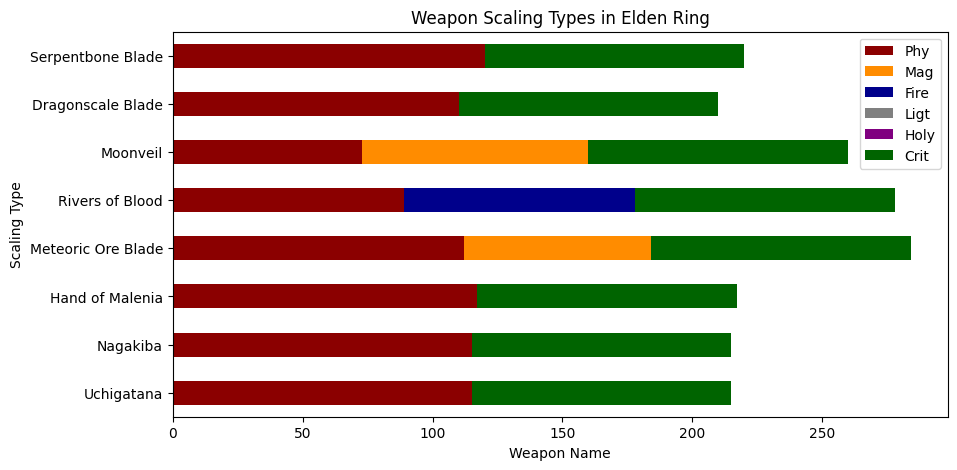

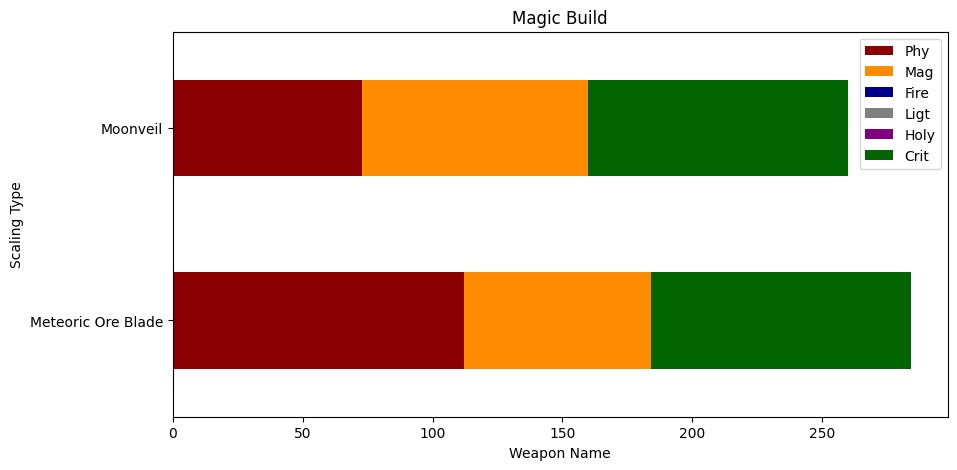

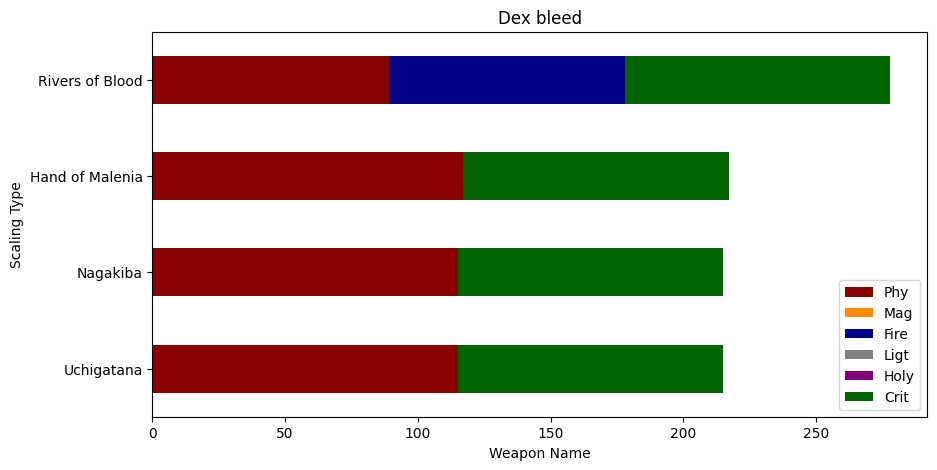

In [30]:
# make graph to compare each katana with their scaling type except empty one. If it has more than 1 scaling type,
# we will use lighter colors to represent the other scaling type
df_katanaWeaponAttack.plot.barh(
    x="name",
    y=["Phy", "Mag", "Fire", "Ligt", "Holy", "Crit"],
    stacked=True,
    figsize=(10, 5),
    color=colors,
)
plt.xlabel("Weapon Name")
plt.ylabel("Scaling Type")
plt.title("Weapon Scaling Types in Elden Ring")
plt.show()

# graph for magic build such that we only compare Moonveil and Meteoric Ore Blade
df_moonveil_meteoric.plot.barh(
    x="name",
    y=["Phy", "Mag", "Fire", "Ligt", "Holy", "Crit"],
    stacked=True,
    figsize=(10, 5),
    color=colors,
)
plt.xlabel("Weapon Name")
plt.ylabel("Scaling Type")
plt.title("Magic Build")
plt.show()

# graph for dex and bleed build such that we only compare Uchigatana, Nagakiba, River of Blood, and Hand of Melenia
df_dex_bleed.plot.barh(
    x="name",
    y=["Phy", "Mag", "Fire", "Ligt", "Holy", "Crit"],
    stacked=True,
    figsize=(10, 5),
    color=colors,
)
plt.xlabel("Weapon Name")
plt.ylabel("Scaling Type")
plt.title("Dex bleed")
plt.show()

In [12]:
# Create a new dataframe with the defence data and the weapon name to work with
df_katanaWeaponDefence = df_katanaWeapon[["name", "defence"]].copy()

# Create new columns for each defence type and set the value to empty string or the defence value if the weapon has that defence type
defence_types = ["Phy", "Mag", "Fire", "Ligt", "Holy", "Boost"]
for defence_type in defence_types:
    df_katanaWeaponDefence[defence_type] = (
        df_katanaWeaponDefence["defence"]
        .apply(
            lambda x: next(
                (
                    d["amount"]
                    for d in json.loads(x.replace("'", '"'))
                    if d["name"] == defence_type
                ),
                "",
            )
        )
        .astype(int)
    )

# Drop the original 'defence' column
df_katanaWeaponDefence = df_katanaWeaponDefence.drop("defence", axis=1)

# Sort and display the katana weapons by their defence for each type
for defence_type in defence_types:
    print(
        f"Sort katana weapons by their {defence_type.lower()} defence and display from highest to lowest"
    )
    display(df_katanaWeaponDefence.sort_values(by=[defence_type], ascending=False))

Sort katana weapons by their phy defence and display from highest to lowest


,name,Phy,Mag,Fire,Ligt,Holy,Boost
209,Meteoric Ore Blade,50,45,31,31,31,30
207,Nagakiba,49,33,33,33,33,33
208,Hand of Malenia,49,33,33,33,33,33
210,Rivers of Blood,47,31,52,31,31,32
206,Uchigatana,45,30,30,30,30,30
213,Serpentbone Blade,45,30,30,30,30,30
212,Dragonscale Blade,35,25,25,50,25,30
211,Moonveil,31,57,26,26,26,31


Sort katana weapons by their mag defence and display from highest to lowest


,name,Phy,Mag,Fire,Ligt,Holy,Boost
211,Moonveil,31,57,26,26,26,31
209,Meteoric Ore Blade,50,45,31,31,31,30
207,Nagakiba,49,33,33,33,33,33
208,Hand of Malenia,49,33,33,33,33,33
210,Rivers of Blood,47,31,52,31,31,32
206,Uchigatana,45,30,30,30,30,30
213,Serpentbone Blade,45,30,30,30,30,30
212,Dragonscale Blade,35,25,25,50,25,30


Sort katana weapons by their fire defence and display from highest to lowest


,name,Phy,Mag,Fire,Ligt,Holy,Boost
210,Rivers of Blood,47,31,52,31,31,32
207,Nagakiba,49,33,33,33,33,33
208,Hand of Malenia,49,33,33,33,33,33
209,Meteoric Ore Blade,50,45,31,31,31,30
206,Uchigatana,45,30,30,30,30,30
213,Serpentbone Blade,45,30,30,30,30,30
211,Moonveil,31,57,26,26,26,31
212,Dragonscale Blade,35,25,25,50,25,30


Sort katana weapons by their ligt defence and display from highest to lowest


,name,Phy,Mag,Fire,Ligt,Holy,Boost
212,Dragonscale Blade,35,25,25,50,25,30
207,Nagakiba,49,33,33,33,33,33
208,Hand of Malenia,49,33,33,33,33,33
209,Meteoric Ore Blade,50,45,31,31,31,30
210,Rivers of Blood,47,31,52,31,31,32
206,Uchigatana,45,30,30,30,30,30
213,Serpentbone Blade,45,30,30,30,30,30
211,Moonveil,31,57,26,26,26,31


Sort katana weapons by their holy defence and display from highest to lowest


,name,Phy,Mag,Fire,Ligt,Holy,Boost
207,Nagakiba,49,33,33,33,33,33
208,Hand of Malenia,49,33,33,33,33,33
209,Meteoric Ore Blade,50,45,31,31,31,30
210,Rivers of Blood,47,31,52,31,31,32
206,Uchigatana,45,30,30,30,30,30
213,Serpentbone Blade,45,30,30,30,30,30
211,Moonveil,31,57,26,26,26,31
212,Dragonscale Blade,35,25,25,50,25,30


Sort katana weapons by their boost defence and display from highest to lowest


,name,Phy,Mag,Fire,Ligt,Holy,Boost
207,Nagakiba,49,33,33,33,33,33
208,Hand of Malenia,49,33,33,33,33,33
210,Rivers of Blood,47,31,52,31,31,32
211,Moonveil,31,57,26,26,26,31
206,Uchigatana,45,30,30,30,30,30
209,Meteoric Ore Blade,50,45,31,31,31,30
212,Dragonscale Blade,35,25,25,50,25,30
213,Serpentbone Blade,45,30,30,30,30,30


In [31]:
# Get rows of Moonveil and Meteoric Ore Blade, and combine them into one dataframe
# Magic build
df_moonveil_meteoric = df_katanaWeaponDefence.loc[
    df_katanaWeaponDefence["name"].isin(magic_buold)
]

# Get rows of Uchigatana, Nagakiba, River of Blood, and Hand of Melenia, and combine them into one dataframe
# Dex bleed build
df_dex_bleed = df_katanaWeaponDefence.loc[
    df_katanaWeaponDefence["name"].isin(dex_bleed_build)
]

# Display the resulting dataframes
display(df_moonveil_meteoric)
display(df_dex_bleed)

,name,Phy,Mag,Fire,Ligt,Holy,Boost
209,Meteoric Ore Blade,50,45,31,31,31,30
211,Moonveil,31,57,26,26,26,31


,name,Phy,Mag,Fire,Ligt,Holy,Boost
206,Uchigatana,45,30,30,30,30,30
207,Nagakiba,49,33,33,33,33,33
208,Hand of Malenia,49,33,33,33,33,33
210,Rivers of Blood,47,31,52,31,31,32


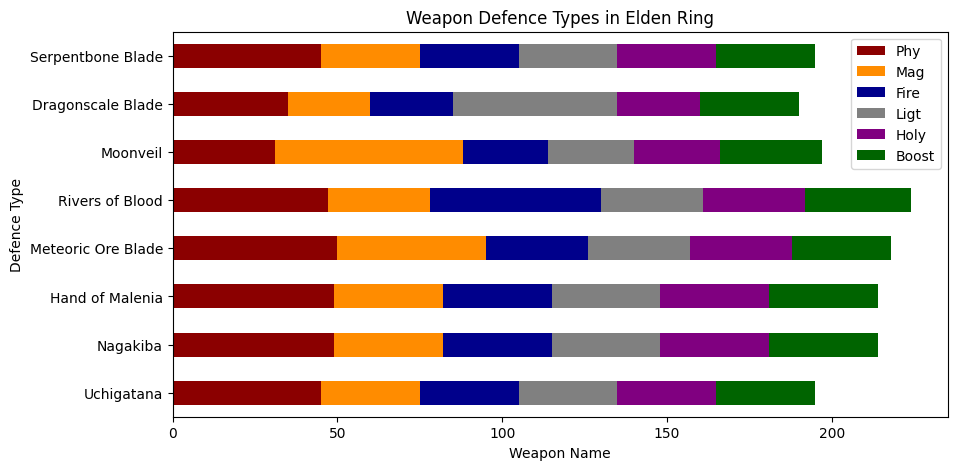

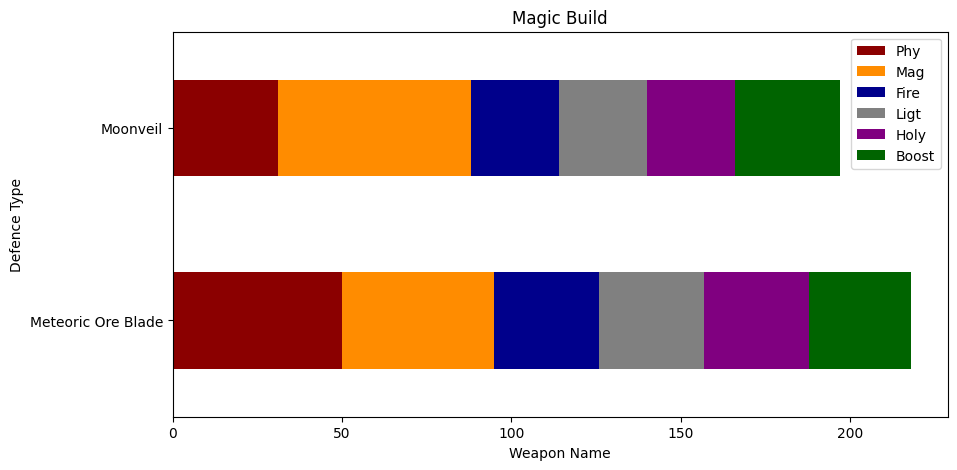

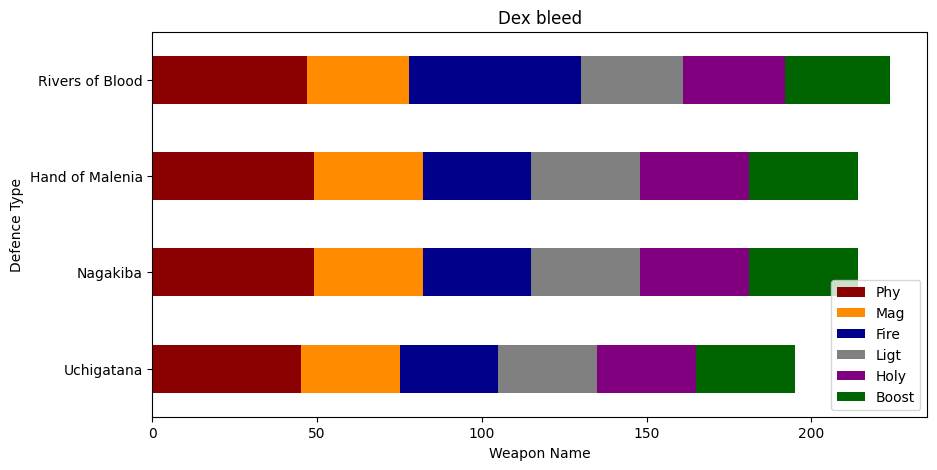

In [32]:
# make graph to compare each katana with their defence type except empty one. If it has more than 1 defence type,
# we will use lighter colors to represent the other defence type
df_katanaWeaponDefence.plot.barh(
    x="name",
    y=["Phy", "Mag", "Fire", "Ligt", "Holy", "Boost"],
    stacked=True,
    figsize=(10, 5),
    color=colors,
)
plt.xlabel("Weapon Name")
plt.ylabel("Defence Type")
plt.title("Weapon Defence Types in Elden Ring")
plt.show()


# graph for magic build such that we only compare Moonveil and Meteoric Ore Blade
df_moonveil_meteoric.plot.barh(
    x="name",
    y=["Phy", "Mag", "Fire", "Ligt", "Holy", "Boost"],
    stacked=True,
    figsize=(10, 5),
    color=colors,
)
plt.xlabel("Weapon Name")
plt.ylabel("Defence Type")
plt.title("Magic Build")
plt.show()

# graph for dex and bleed build such that we only compare Uchigatana, Nagakiba, River of Blood, and Hand of Melenia
df_dex_bleed.plot.barh(
    x="name",
    y=["Phy", "Mag", "Fire", "Ligt", "Holy", "Boost"],
    stacked=True,
    figsize=(10, 5),
    color=colors,
)
plt.xlabel("Weapon Name")
plt.ylabel("Defence Type")
plt.title("Dex bleed")
plt.show()

In [15]:
# Read in file that max upgrade level for each weapon
df_weaponMaxUpgrade = pd.read_csv("weapons-std.csv")

# Remove last and second columns since they're not needed
df_weaponMaxUpgrade = df_weaponMaxUpgrade.iloc[
    :, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
]

# Split columns into 3 dataframes
df_weaponMaxUpgradeAttack = df_weaponMaxUpgrade.iloc[:, 0:8]
df_weaponMaxUpgradeScaling = df_weaponMaxUpgrade.iloc[:, [0, 8, 9, 10, 11, 12]]
df_weaponMaxUpgradeDefence = df_weaponMaxUpgrade.iloc[
    :, [0, 13, 14, 15, 16, 17, 18, 19, 20]
]

# Convert object columns to int64
df_weaponMaxUpgradeAttack.iloc[:, 1:] = (
    df_weaponMaxUpgradeAttack.iloc[:, 1:].replace("-", 0).astype(int)
)
df_weaponMaxUpgradeDefence.iloc[:, 1:] = (
    df_weaponMaxUpgradeDefence.iloc[:, 1:].replace("-", 0).astype(int)
)

# remove last column of attack dataframe since it's not needed
df_weaponMaxUpgradeAttack = df_weaponMaxUpgradeAttack.iloc[:, :-1]

# remove 2nd column of defence dataframe but keep 1st and the rest
df_weaponMaxUpgradeDefence = df_weaponMaxUpgradeDefence.iloc[:, [0, 2, 3, 4, 5, 6, 7]]

# Display the resulting dataframes
display(
    df_weaponMaxUpgradeAttack, df_weaponMaxUpgradeScaling, df_weaponMaxUpgradeDefence
)

,Name,Phy,Mag,Fir,Lit,Hol,Cri
0,Dragonscale Blade,269,0,0,0,0,100
1,Hand of Malenia,286,0,0,0,0,100
2,Meteoric Ore Blade,274,176,0,0,0,100
3,Moonveil,178,213,0,0,0,100
4,Nagakiba,281,0,0,0,0,100
5,Rivers of Blood,186,0,186,0,0,100
6,Serpentbone Blade,294,0,0,0,0,100
7,Uchigatana,281,0,0,0,0,100


,Name,Str,Dex,Int,Fai,Arc
0,Dragonscale Blade,D,B,-,-,-
1,Hand of Malenia,E,B,-,-,-
2,Meteoric Ore Blade,C,D,C,-,-
3,Moonveil,E,B,B,-,-
4,Nagakiba,D,B,-,-,-
5,Rivers of Blood,E,B,-,-,D
6,Serpentbone Blade,E,B,-,-,-
7,Uchigatana,D,C,-,-,-


,Name,PhyD,MagD,FirD,LitD,HolD,BstD
0,Dragonscale Blade,35,25,25,50,25,33.0
1,Hand of Malenia,49,33,33,33,33,36.0
2,Meteoric Ore Blade,50,45,31,31,31,36.0
3,Moonveil,31,57,26,26,26,34.0
4,Nagakiba,49,33,33,33,33,39.0
5,Rivers of Blood,36,26,52,26,26,34.0
6,Serpentbone Blade,45,30,30,30,30,36.0
7,Uchigatana,45,30,30,30,30,36.0


In [16]:
# magic build
# Get rows of Moonveil and Meteoric Ore Blade, and combine them into one dataframe
df_moonveil_meteoric = df_weaponMaxUpgradeAttack.loc[
    df_weaponMaxUpgradeAttack["Name"].isin(magic_buold)
]

# dex bleed build
df_dex_bleed = df_weaponMaxUpgradeAttack.loc[
    df_weaponMaxUpgradeAttack["Name"].isin(dex_bleed_build)
]

# Display the resulting dataframes
display(df_moonveil_meteoric, df_dex_bleed)

,Name,Phy,Mag,Fir,Lit,Hol,Cri
2,Meteoric Ore Blade,274,176,0,0,0,100
3,Moonveil,178,213,0,0,0,100


,Name,Phy,Mag,Fir,Lit,Hol,Cri
1,Hand of Malenia,286,0,0,0,0,100
4,Nagakiba,281,0,0,0,0,100
5,Rivers of Blood,186,0,186,0,0,100
7,Uchigatana,281,0,0,0,0,100


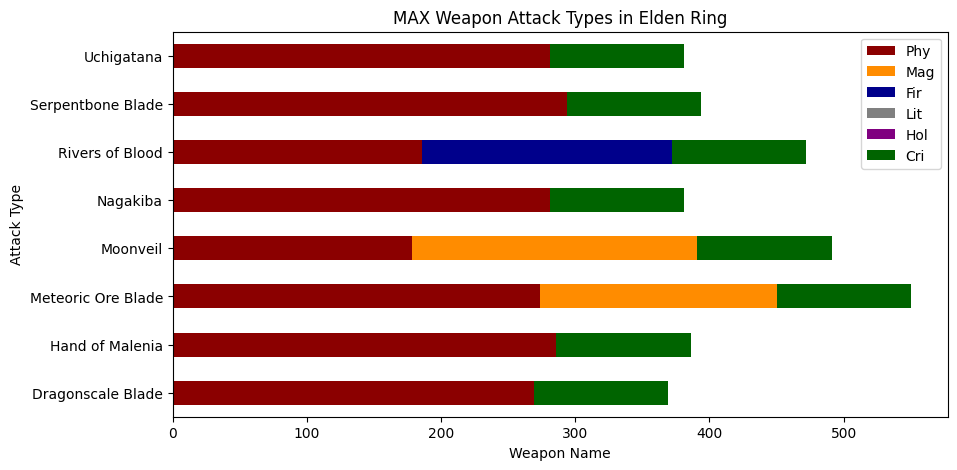

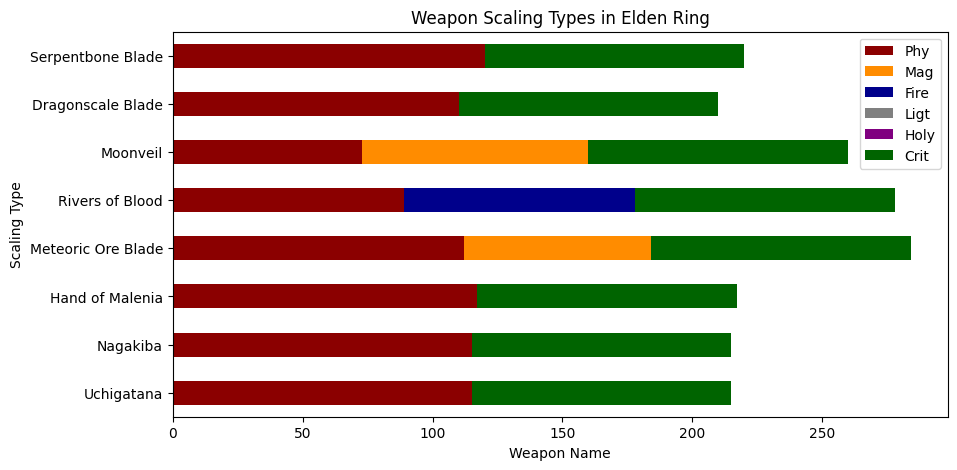

In [17]:
# make graphs to compare each katana with their attack type except empty one. If it has more than 1 attack type,
# we will use lighter colors to represent the other attack type
# we will also compare this data with teh previous data to see if there are any changes
# Name	Phy	Mag	Fir	Lit	Hol	Cri	Sta
df_weaponMaxUpgradeAttack.plot.barh(
    x="Name",
    y=["Phy", "Mag", "Fir", "Lit", "Hol", "Cri"],
    stacked=True,
    figsize=(10, 5),
    color=colors,
)
plt.xlabel("Weapon Name")
plt.ylabel("Attack Type")
plt.title("MAX Weapon Attack Types in Elden Ring")
plt.show()

# old graph for all katana
df_katanaWeaponAttack.plot.barh(
    x="name",
    y=["Phy", "Mag", "Fire", "Ligt", "Holy", "Crit"],
    stacked=True,
    figsize=(10, 5),
    color=colors,
)
plt.xlabel("Weapon Name")
plt.ylabel("Scaling Type")
plt.title("Weapon Scaling Types in Elden Ring")
plt.show()

In [33]:
# we create a function to do the graphing for us that similar to the one below
def graphWeaponCompare(old_data, new_data, name_list, title, x_label, y_label):
    # Display the resulting dataframes
    display("old data: ", old_data, "new data: ", new_data)

    # create a graph to compare old and new data so like we will have 1 graph that for each
    # katana and it will have 2 bars, one for old and one for new data
    # we will do barh

    # set height of bar
    barHeight = 0.25

    # set width of bar
    old_data_width = np.array(old_data.iloc[:, 1:].values.tolist())
    new_data_width = np.array(new_data.iloc[:, 1:].values.tolist())

    # Set position of bar on X axis
    r1 = np.arange(len(name_list))
    r2 = [x + barHeight for x in r1]

    # name	Phy	Mag	Fire	Ligt	Holy	Crit
    # set up figure size
    plt.figure(figsize=(20, 10))

    # Make the plot for old data
    left = np.zeros(len(name_list))
    for i, col in enumerate(old_data_width.T):
        plt.barh(
            r1,
            col,
            color=colors[i],
            height=barHeight,
            edgecolor="white",
            label=old_data.columns[i + 1],
            left=left,
        )
        left += col

    # Make the plot for new data
    left = np.zeros(len(name_list))
    for i, col in enumerate(new_data_width.T):
        plt.barh(
            r2,
            col,
            color=new_colors[i],
            height=barHeight,
            edgecolor="white",
            label=new_data.columns[i + 1],
            left=left,
        )
        left += col

    # Add xticks on the middle of the group bars
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.yticks([r + barHeight for r in range(len(name_list))], name_list)

    # Create legend & Show graphic
    plt.legend()
    plt.show()

'old data: '

,name,Phy,Mag,Fire,Ligt,Holy,Crit
206,Uchigatana,115,0,0,0,0,100
207,Nagakiba,115,0,0,0,0,100
208,Hand of Malenia,117,0,0,0,0,100
209,Meteoric Ore Blade,112,72,0,0,0,100
210,Rivers of Blood,89,0,89,0,0,100
211,Moonveil,73,87,0,0,0,100
212,Dragonscale Blade,110,0,0,0,0,100
213,Serpentbone Blade,120,0,0,0,0,100


'new data: '

,Name,Phy,Mag,Fir,Lit,Hol,Cri
0,Dragonscale Blade,269,0,0,0,0,100
1,Hand of Malenia,286,0,0,0,0,100
2,Meteoric Ore Blade,274,176,0,0,0,100
3,Moonveil,178,213,0,0,0,100
4,Nagakiba,281,0,0,0,0,100
5,Rivers of Blood,186,0,186,0,0,100
6,Serpentbone Blade,294,0,0,0,0,100
7,Uchigatana,281,0,0,0,0,100


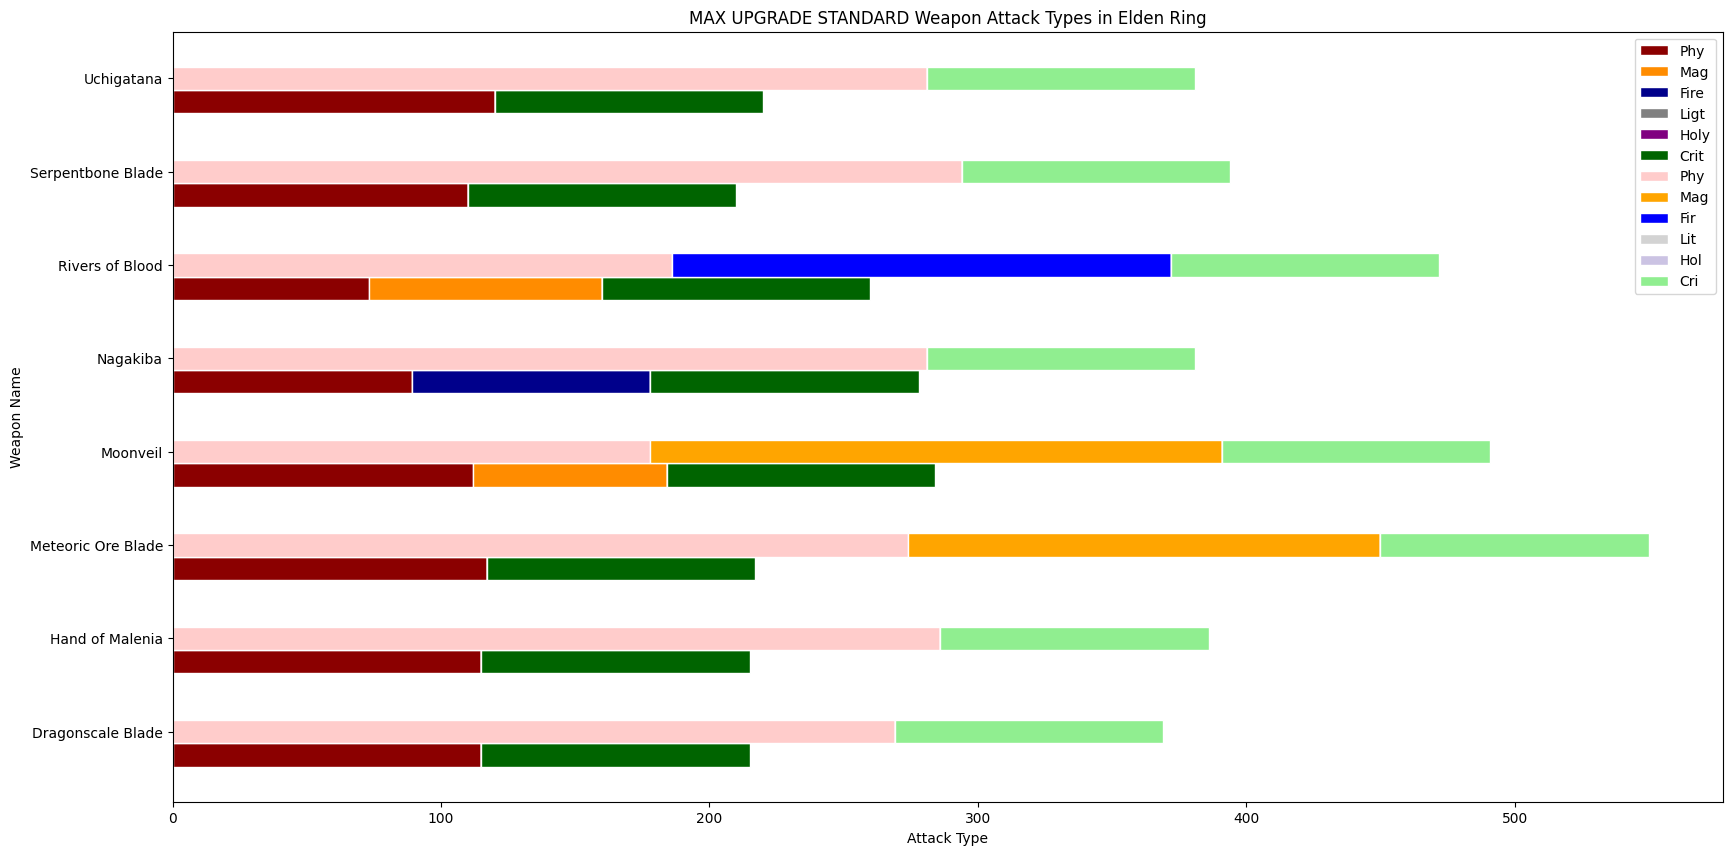

In [34]:
# Get list of katana names
katana_names = df_weaponMaxUpgradeAttack["Name"].tolist()

# Get old and new data for each katana based on their name
old_data = df_katanaWeaponAttack.loc[df_katanaWeaponAttack["name"].isin(katana_names)]
new_data = df_weaponMaxUpgradeAttack.loc[
    df_weaponMaxUpgradeAttack["Name"].isin(katana_names)
]

# Call the function to graph the data
graphWeaponCompare(
    old_data,
    new_data,
    katana_names,
    "MAX UPGRADE STANDARD Weapon Attack Types in Elden Ring",
    "Attack Type",
    "Weapon Name",
)

'old data: '

,name,Phy,Mag,Fire,Ligt,Holy,Crit
209,Meteoric Ore Blade,112,72,0,0,0,100
211,Moonveil,73,87,0,0,0,100


'new data: '

,Name,Phy,Mag,Fir,Lit,Hol,Cri
2,Meteoric Ore Blade,274,176,0,0,0,100
3,Moonveil,178,213,0,0,0,100


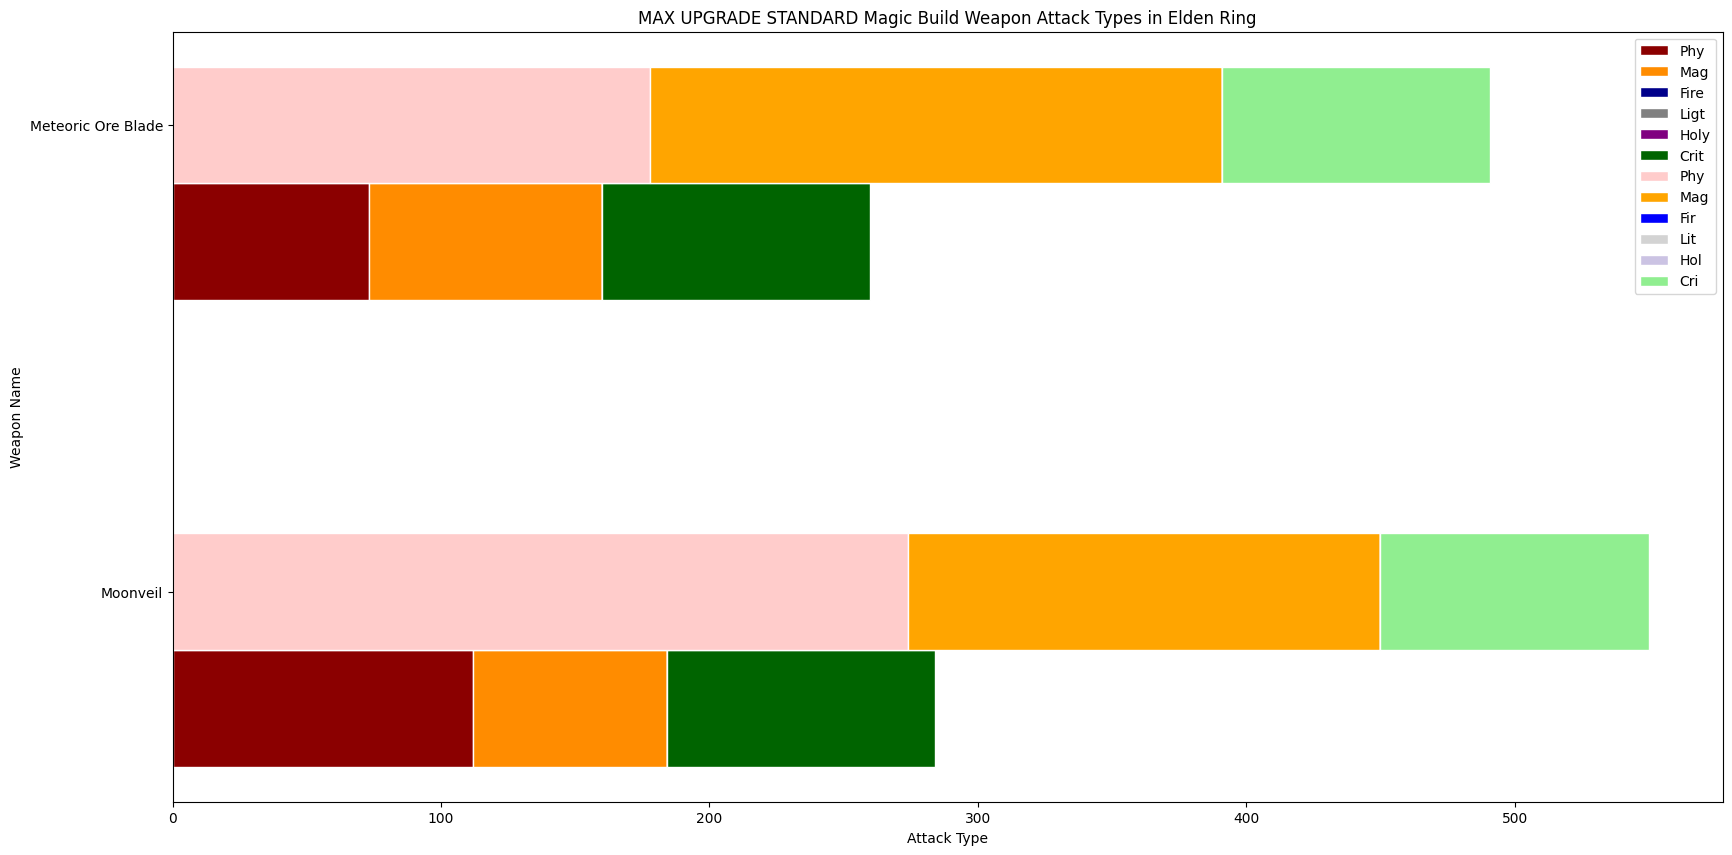

In [20]:
# get new and old data for magic build
old_data = df_katanaWeaponAttack.loc[df_katanaWeaponAttack["name"].isin(magic_buold)]
new_data = df_weaponMaxUpgradeAttack.loc[
    df_weaponMaxUpgradeAttack["Name"].isin(magic_buold)
]

# Call the function to graph the data
graphWeaponCompare(
    old_data,
    new_data,
    magic_buold,
    "MAX UPGRADE STANDARD Magic Build Weapon Attack Types in Elden Ring",
    "Attack Type",
    "Weapon Name",
)

'old data: '

,name,Phy,Mag,Fire,Ligt,Holy,Crit
206,Uchigatana,115,0,0,0,0,100
207,Nagakiba,115,0,0,0,0,100
208,Hand of Malenia,117,0,0,0,0,100
210,Rivers of Blood,89,0,89,0,0,100


'new data: '

,Name,Phy,Mag,Fir,Lit,Hol,Cri
1,Hand of Malenia,286,0,0,0,0,100
4,Nagakiba,281,0,0,0,0,100
5,Rivers of Blood,186,0,186,0,0,100
7,Uchigatana,281,0,0,0,0,100


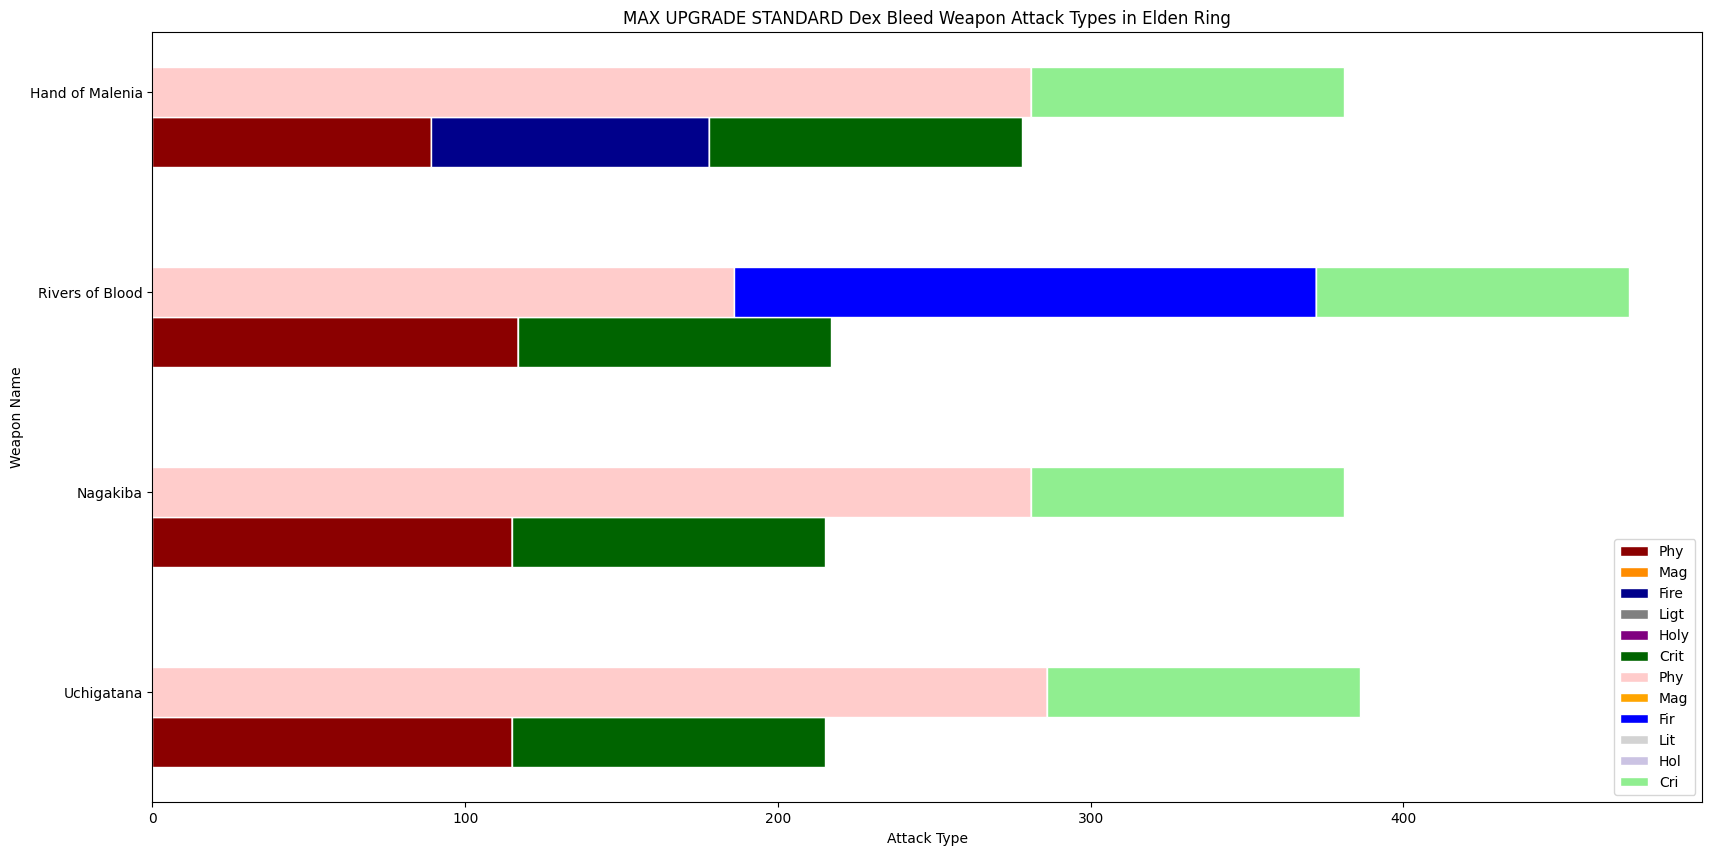

In [21]:
# dex bleed build
# Get new and old data for dex bleed build
old_data = df_katanaWeaponAttack.loc[
    df_katanaWeaponAttack["name"].isin(dex_bleed_build)
]
new_data = df_weaponMaxUpgradeAttack.loc[
    df_weaponMaxUpgradeAttack["Name"].isin(dex_bleed_build)
]

# Call the function to graph the data
graphWeaponCompare(
    old_data,
    new_data,
    dex_bleed_build,
    "MAX UPGRADE STANDARD Dex Bleed Weapon Attack Types in Elden Ring",
    "Attack Type",
    "Weapon Name",
)

In [22]:
# now we analyze the defence data
# magic build defence data
# remove last column since it's not needed


# general
display(df_weaponMaxUpgradeDefence)
# Get rows of Moonveil and Meteoric Ore Blade, and combine them into one dataframe
df_moonveil_meteoric = df_weaponMaxUpgradeDefence.loc[
    df_weaponMaxUpgradeDefence["Name"].isin(magic_buold)
]

# dex bleed build defence data
df_dex_bleed = df_weaponMaxUpgradeDefence.loc[
    df_weaponMaxUpgradeDefence["Name"].isin(dex_bleed_build)
]

# Display the resulting dataframes
display(df_moonveil_meteoric, df_dex_bleed)

,Name,PhyD,MagD,FirD,LitD,HolD,BstD
0,Dragonscale Blade,35,25,25,50,25,33.0
1,Hand of Malenia,49,33,33,33,33,36.0
2,Meteoric Ore Blade,50,45,31,31,31,36.0
3,Moonveil,31,57,26,26,26,34.0
4,Nagakiba,49,33,33,33,33,39.0
5,Rivers of Blood,36,26,52,26,26,34.0
6,Serpentbone Blade,45,30,30,30,30,36.0
7,Uchigatana,45,30,30,30,30,36.0


,Name,PhyD,MagD,FirD,LitD,HolD,BstD
2,Meteoric Ore Blade,50,45,31,31,31,36.0
3,Moonveil,31,57,26,26,26,34.0


,Name,PhyD,MagD,FirD,LitD,HolD,BstD
1,Hand of Malenia,49,33,33,33,33,36.0
4,Nagakiba,49,33,33,33,33,39.0
5,Rivers of Blood,36,26,52,26,26,34.0
7,Uchigatana,45,30,30,30,30,36.0


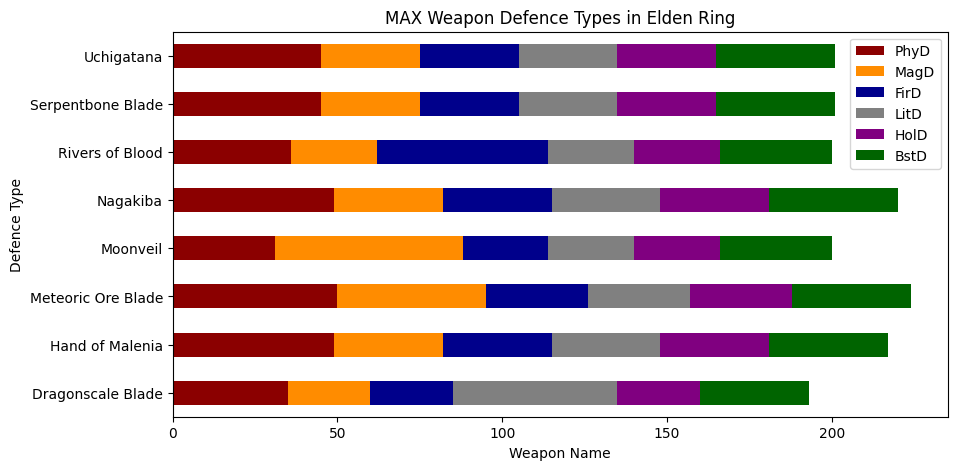

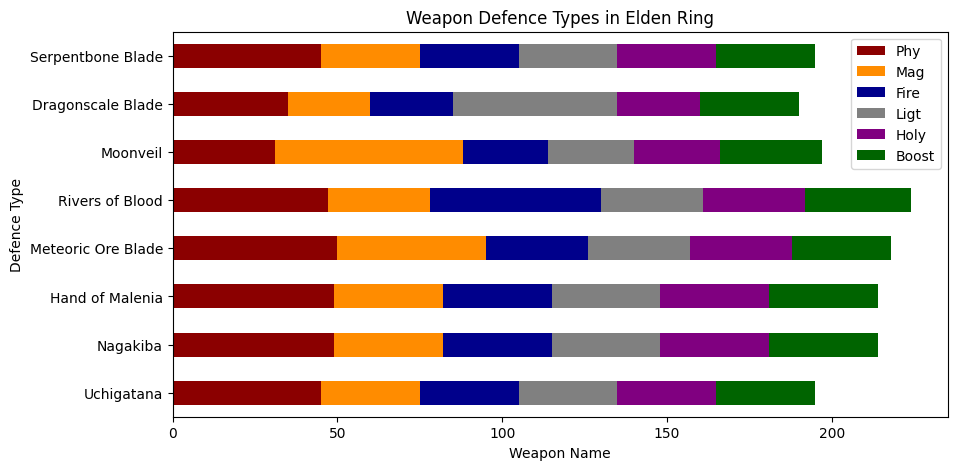

In [23]:
# graph for new and old data for all katana
# we will also compare this data with teh previous data to see if there are any changes
# Name	Any	PhyD	MagD	FirD	LitD	HolD	BstD	RstD
df_weaponMaxUpgradeDefence.plot.barh(
    x="Name",
    y=["PhyD", "MagD", "FirD", "LitD", "HolD", "BstD"],
    stacked=True,
    figsize=(10, 5),
    color=colors,
)
plt.xlabel("Weapon Name")
plt.ylabel("Defence Type")
plt.title("MAX Weapon Defence Types in Elden Ring")
plt.show()

# old graph for all katana
df_katanaWeaponDefence.plot.barh(
    x="name",
    y=["Phy", "Mag", "Fire", "Ligt", "Holy", "Boost"],
    stacked=True,
    figsize=(10, 5),
    color=colors,
)
plt.xlabel("Weapon Name")
plt.ylabel("Defence Type")
plt.title("Weapon Defence Types in Elden Ring")
plt.show()

'old data: '

,name,Phy,Mag,Fire,Ligt,Holy,Boost
206,Uchigatana,45,30,30,30,30,30
207,Nagakiba,49,33,33,33,33,33
208,Hand of Malenia,49,33,33,33,33,33
209,Meteoric Ore Blade,50,45,31,31,31,30
210,Rivers of Blood,47,31,52,31,31,32
211,Moonveil,31,57,26,26,26,31
212,Dragonscale Blade,35,25,25,50,25,30
213,Serpentbone Blade,45,30,30,30,30,30


'new data: '

,Name,PhyD,MagD,FirD,LitD,HolD,BstD
0,Dragonscale Blade,35,25,25,50,25,33.0
1,Hand of Malenia,49,33,33,33,33,36.0
2,Meteoric Ore Blade,50,45,31,31,31,36.0
3,Moonveil,31,57,26,26,26,34.0
4,Nagakiba,49,33,33,33,33,39.0
5,Rivers of Blood,36,26,52,26,26,34.0
6,Serpentbone Blade,45,30,30,30,30,36.0
7,Uchigatana,45,30,30,30,30,36.0


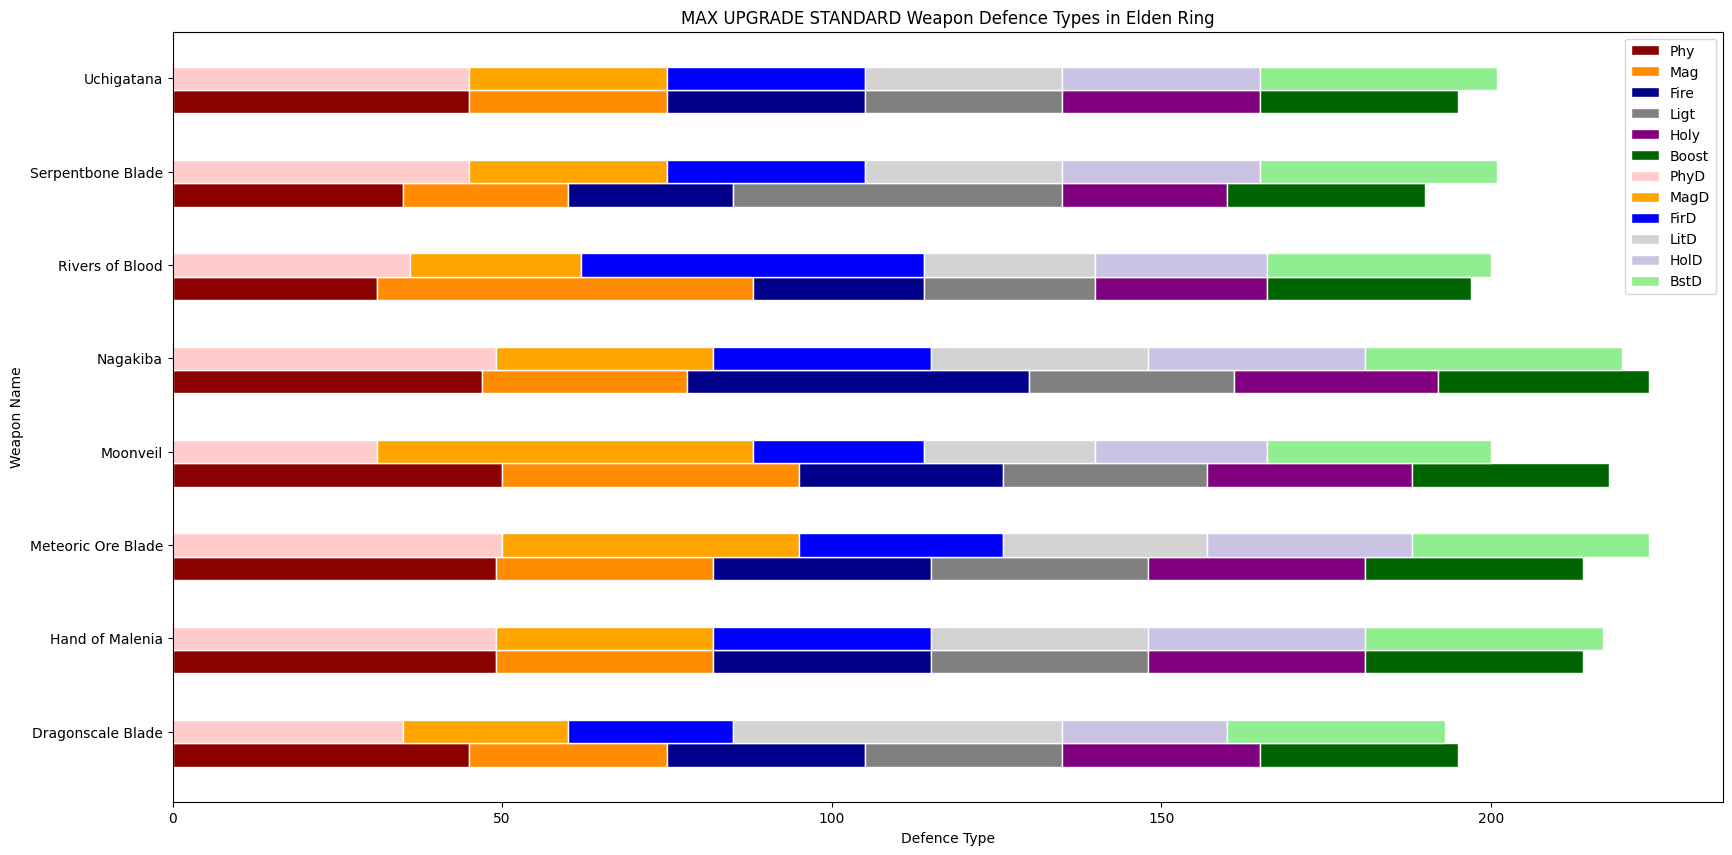

In [24]:
# Get old and new data for each katana based on their name
old_data = df_katanaWeaponDefence.loc[df_katanaWeaponDefence["name"].isin(katana_names)]
new_data = df_weaponMaxUpgradeDefence.loc[
    df_weaponMaxUpgradeDefence["Name"].isin(katana_names)
]

# Call the function to graph the data
graphWeaponCompare(
    old_data,
    new_data,
    katana_names,
    "MAX UPGRADE STANDARD Weapon Defence Types in Elden Ring",
    "Defence Type",
    "Weapon Name",
)

'old data: '

,name,Phy,Mag,Fire,Ligt,Holy,Boost
209,Meteoric Ore Blade,50,45,31,31,31,30
211,Moonveil,31,57,26,26,26,31


'new data: '

,Name,PhyD,MagD,FirD,LitD,HolD,BstD
2,Meteoric Ore Blade,50,45,31,31,31,36.0
3,Moonveil,31,57,26,26,26,34.0


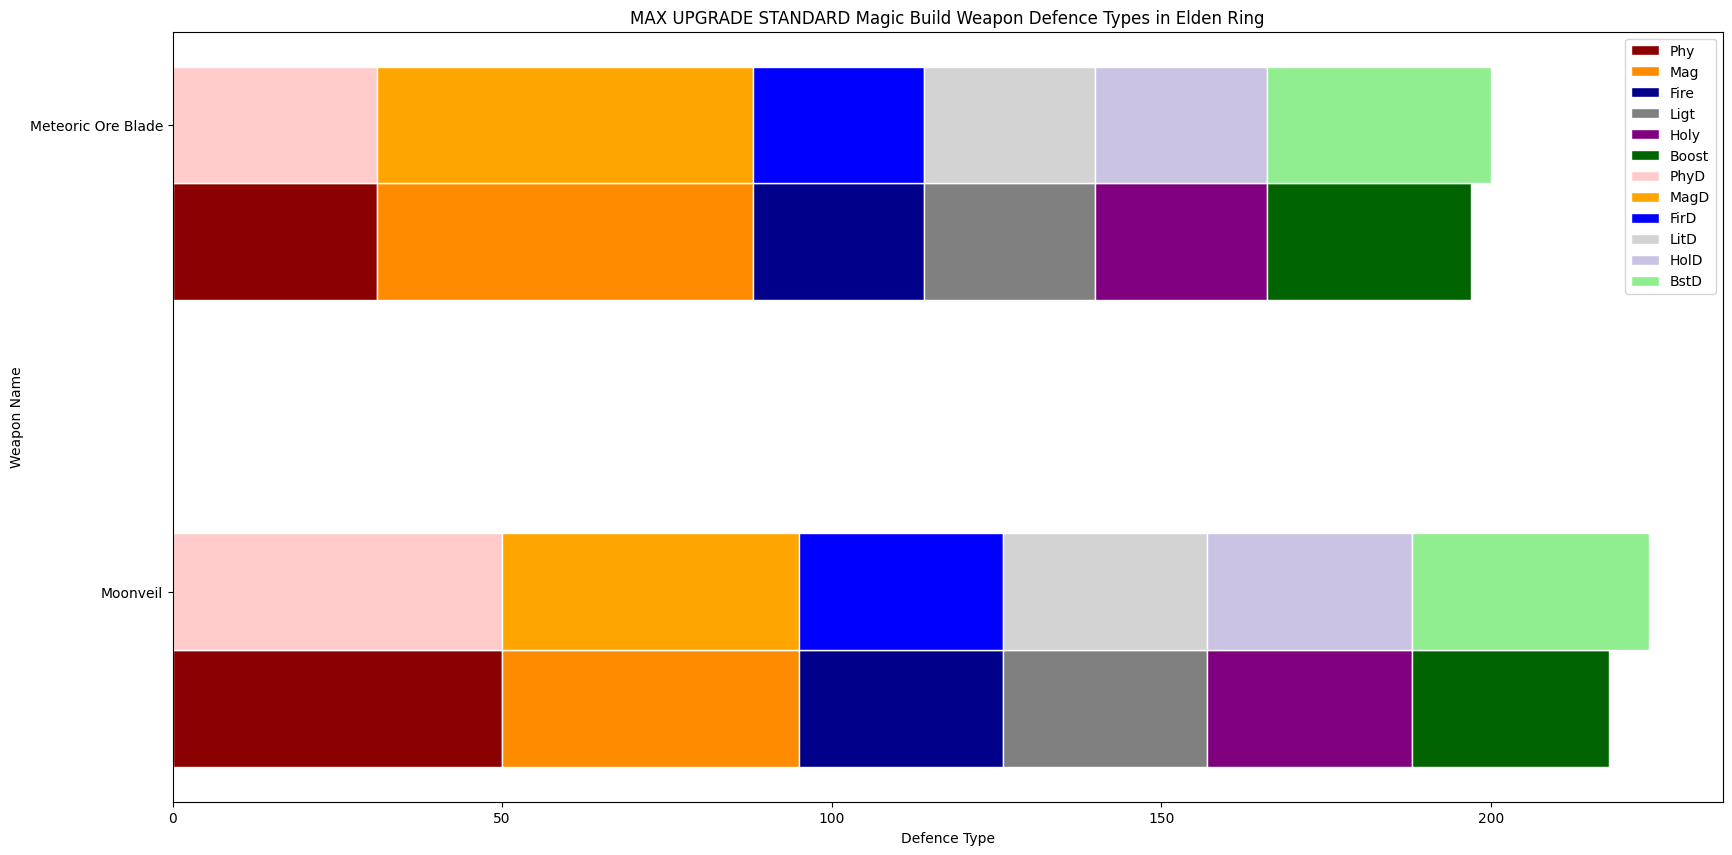

In [25]:
# get new and old data for magic build
old_data = df_katanaWeaponDefence.loc[df_katanaWeaponDefence["name"].isin(magic_buold)]
new_data = df_weaponMaxUpgradeDefence.loc[
    df_weaponMaxUpgradeDefence["Name"].isin(magic_buold)
]

# Call the function to graph the data
graphWeaponCompare(
    old_data,
    new_data,
    magic_buold,
    "MAX UPGRADE STANDARD Magic Build Weapon Defence Types in Elden Ring",
    "Defence Type",
    "Weapon Name",
)

'old data: '

,name,Phy,Mag,Fire,Ligt,Holy,Boost
206,Uchigatana,45,30,30,30,30,30
207,Nagakiba,49,33,33,33,33,33
208,Hand of Malenia,49,33,33,33,33,33
210,Rivers of Blood,47,31,52,31,31,32


'new data: '

,Name,PhyD,MagD,FirD,LitD,HolD,BstD
1,Hand of Malenia,49,33,33,33,33,36.0
4,Nagakiba,49,33,33,33,33,39.0
5,Rivers of Blood,36,26,52,26,26,34.0
7,Uchigatana,45,30,30,30,30,36.0


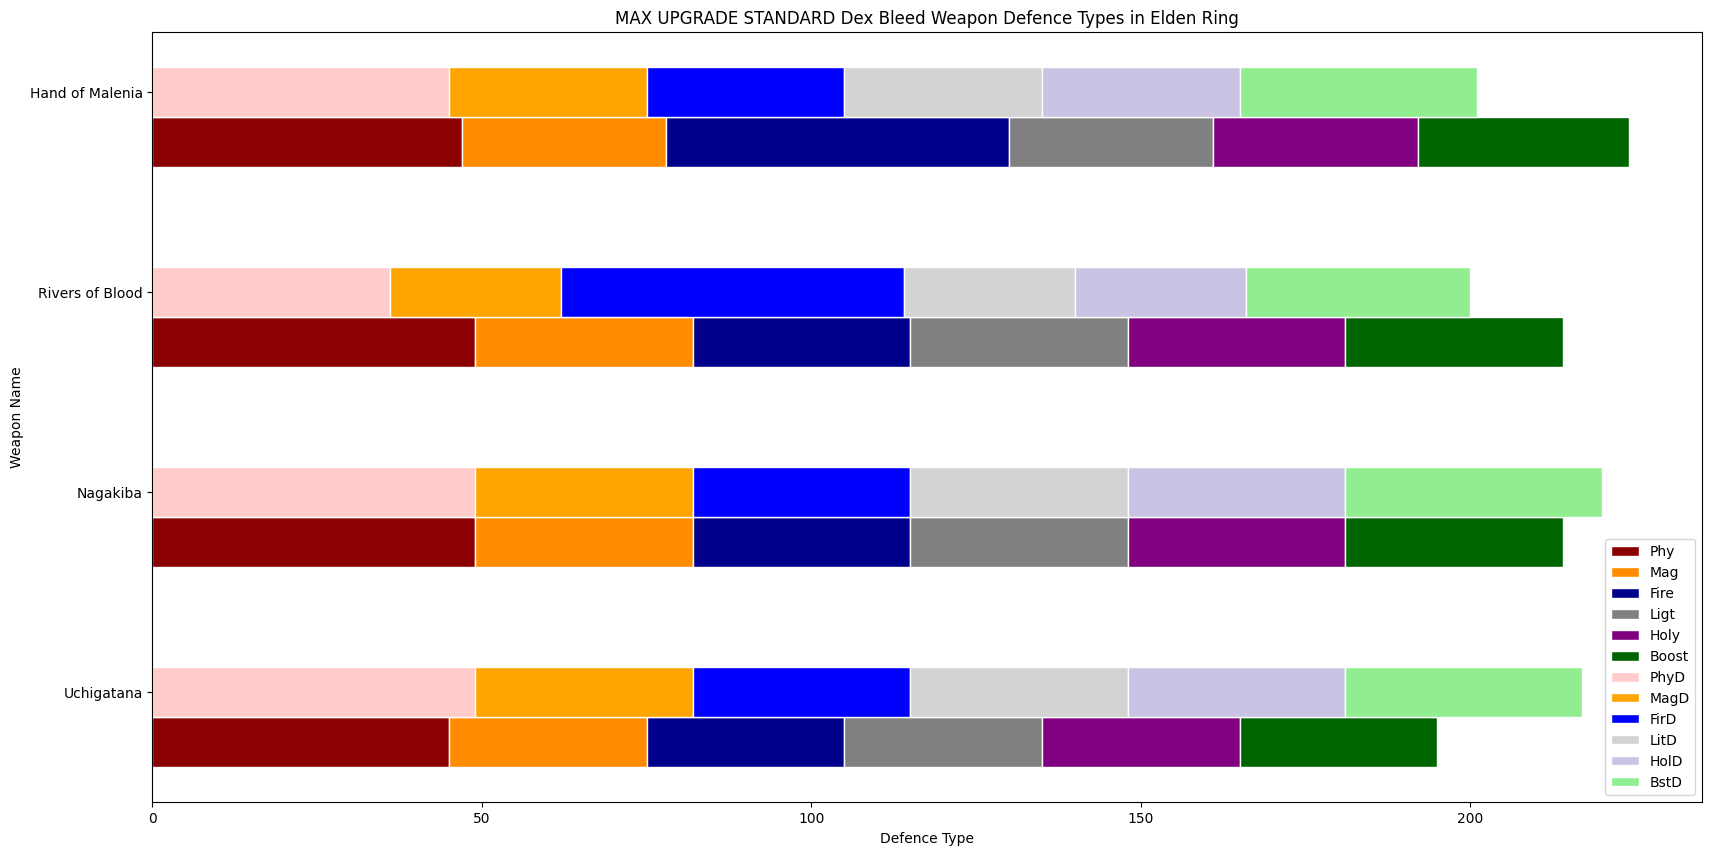

In [26]:
# dex bleed build
# Get new and old data for dex bleed build
old_data = df_katanaWeaponDefence.loc[
    df_katanaWeaponDefence["name"].isin(dex_bleed_build)
]
new_data = df_weaponMaxUpgradeDefence.loc[
    df_weaponMaxUpgradeDefence["Name"].isin(dex_bleed_build)
]

# Call the function to graph the data
graphWeaponCompare(
    old_data,
    new_data,
    dex_bleed_build,
    "MAX UPGRADE STANDARD Dex Bleed Weapon Defence Types in Elden Ring",
    "Defence Type",
    "Weapon Name",
)

In [27]:
# scaling data
# general
display(df_weaponMaxUpgradeScaling)

# Get rows of Moonveil and Meteoric Ore Blade, and combine them into one dataframe
df_moonveil_meteoric = df_weaponMaxUpgradeScaling.loc[
    df_weaponMaxUpgradeScaling["Name"].isin(magic_buold)
]

# dex bleed build
df_dex_bleed = df_weaponMaxUpgradeScaling.loc[
    df_weaponMaxUpgradeScaling["Name"].isin(dex_bleed_build)
]

# Display the resulting dataframes
display(df_moonveil_meteoric, df_dex_bleed)

,Name,Str,Dex,Int,Fai,Arc
0,Dragonscale Blade,D,B,-,-,-
1,Hand of Malenia,E,B,-,-,-
2,Meteoric Ore Blade,C,D,C,-,-
3,Moonveil,E,B,B,-,-
4,Nagakiba,D,B,-,-,-
5,Rivers of Blood,E,B,-,-,D
6,Serpentbone Blade,E,B,-,-,-
7,Uchigatana,D,C,-,-,-


,Name,Str,Dex,Int,Fai,Arc
2,Meteoric Ore Blade,C,D,C,-,-
3,Moonveil,E,B,B,-,-


,Name,Str,Dex,Int,Fai,Arc
1,Hand of Malenia,E,B,-,-,-
4,Nagakiba,D,B,-,-,-
5,Rivers of Blood,E,B,-,-,D
7,Uchigatana,D,C,-,-,-
